Task - 1: Implementation of MCP Neurons:
1. Design a MCP Neuron for ”AND” Boolean Functions and ”OR” Boolean Functions with two
inputs:
Hint:
• Aggregate all the inputs.
• Handcraft a Threshold values for ”AND” and ”OR” Function.
• Implement a if else statement as stated above.
You may use code base provided below or write your own code from scratch:

In [19]:
import numpy as np

ModuleNotFoundError: No module named 'numpy'

###For ”AND” Operations.

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let’s name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []
  for i in range(len(X1)):
    threshold = X1[i] + X2[i]
    if threshold >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)

  return state_neuron

###Sample Usage for ”AND” Function.

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2 # Threshold value
# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)
# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


###For ”OR” Operations.

In [ ]:
def MCP_Neurons_OR(X1, X2, T):
  """
  This function implements basic OR operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1D array): An array of binary values.
  X2 (1D array): An array of binary values.
  Output:
  state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
  """

  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let’s name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []
  for i in range(len(X1)):
    threshold = X1[i] + X2[i]
    if threshold >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)
  return state_neuron

###Sample Usage for ”OR” Function.

In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1 # Threshold value for OR gate
# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)
# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


Answer the Following Question:

• You can use Text cell of your notebook to answer the question.

• Question - 1: List out all the limitations of MCP - Neurons.

• Question - 2: Think if you can develop a logic to solve for XOR
function using MCP Neuron.

{Can you devise a if else rules.}

Task 2: Perceptron Algorithm for 0 vs 1 Classification.
1. Objective:

    In this exercise, you will implement a Perceptron learning algorithm for binary classification using the
    MNIST dataset. Specifically, you will classify the digits 0 and 1. After completing the Perceptron
    algorithm, you will evaluate the model’s performance and visualize misclassified images.

Dataset: mnist_0_and_1.csv

2. Load the Dataset:
Start by loading the MNIST dataset containing digits 0 and 1.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df_01 = pd.read_csv("/content/drive/MyDrive/AI and ML/Worksheet3/mnist_3_and_5.csv")

# Extract Features and labels

X = df_01.drop(columns=["label"]).values #784 pixels
y = df_01['label'].values # Labels (0 or 1)
df_01.sample(10)


,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
1590,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
634,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1164,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1032,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1874,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1647,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2394,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
689,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check the shape of the features and labels
print("Feature matrix shape: ",X.shape)
print("Label vector shape: ",y.shape)

Feature matrix shape:  (2741, 784)
Label vector shape:  (2741,)


Answer the Following Question:

1. Question - 1: What does the shape of X represent?

Ans: The shape of X respresents the row and column of the feature matrix



###Visualize the Dataset:

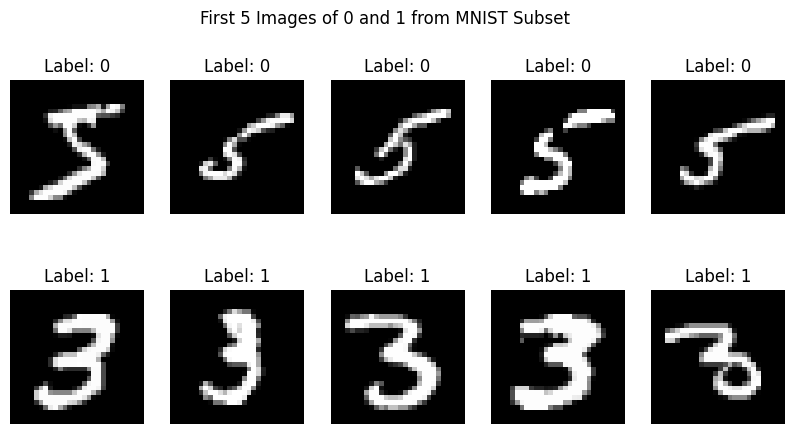

In [ ]:
import matplotlib.pyplot as plt

# Separate images for label 0 and label 1
images_0 = X[y == 5] # Get all images with label 0
images_1 = X[y == 3] # Get all images with label 1
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
  print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
  for i in range(5):
  # Plot digit 0
    axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 0")
    axes[0, i].axis("off")
    # Plot digit 1
    axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 1")
    axes[1, i].axis("off")
  plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
  plt.show()

Initialize Weights and Bias:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) #784 weights (one for each pixel )
bias =0
learning_rate=0.1
epochs = 100

Answer the Following Question:

1. Question - 3: What does the weights array represent in this context?
ANS:

  * The weights array represents the importance or influence of each pixel in the image when making a prediction.4

  * Since each image in the dataset is 28x28 pixels (784 pixels in total), there is one weight associated with each pixel.

  * These weights are updated during training to help the perceptron learn which pixels are more relevant for distinguishing between different digits (e.g., 5 and 3).

2. Question - 4: Why are we initializing the weights to zero? What effect could this
have on the training process?
ANS:
  * Initializing the weights to zero is done to start the learning process from scratch without any prior bias.

  * Effect on training: If all weights are initialized to zero, the model can still learn in this case because the perceptron learning algorithm is based on updating weights during misclassification.

###Implement a Decision Function or Activation Function:

In [ ]:
def decision_function(X, weights, bias):
  """
  Compute the predicted labels for the input data.
  Parameters:
  - X: Features (input data) as a numpy array of shape (n_samples, n_features)
  - weights: Updated weights after training
  - bias: Updated bias after training
  Returns:
  - y_pred_all: The predicted labels for the input data
  """
  predictions = np.dot(X, weights) + bias
  #####Your Code Here############ # Activation function (step function)
  y_pred_all = np.where(predictions >=0 ,1,0)
  return y_pred_all

###Implement the Perceptron Learning Algorithm:

In [ ]:
import numpy as np
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
  """
  Train the perceptron using the Perceptron Learning Algorithm.
  Parameters:
  - X: Features (input data) as a numpy array of shape (n_samples, n_features)
  - y: Labels (true output) as a numpy array of shape (n_samples,)
  - weights: Initial weights as a numpy array of shape (n_features,)
  - bias: Initial bias value (scalar)
  - learning_rate: Learning rate for weight updates (default is 0.1)
  - epochs: Number of iterations to train the model (default is 100)
  Returns:
  - weights: Updated weights after training
  - bias: Updated bias after training
  - accuracy: Total correct prediction.
  """
  # Step 3: Perceptron Learning Algorithm
  # Your Code here#
  for epoch in range(0,epochs,10):
    total_correct =0
    for i in range(len(X1)):
      # Calculate prediction using decision function
      y_pred = decision_function(X[i], weights, bias)
      # Find the error for each value of y
      error = y[i] - y_pred
      # If error not equal to 0 update the weight and bias else if the error is 1 increase the total_correct variable
      if error !=0:
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
      else:
        total_correct +=1

      accuracy = total_correct / len(X)
      print(f"Epoch: {epoch}: Accuracy= {accuracy}")
  return weights, bias, accuracy

Answer the Following Question:

Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

ANS: The purpose of the output np.dot(X[i], weights) + bias line) is to calculate the weighted sum of inputs plus the bias, which is also known as the activation function in the perceptron algorithm.

Question - 6: What happens when the prediction is wrong? How are the weights and
bias updated?

ANS: When the prediction is wrong in the perceptron algorithm, it means the output produced by the perceptron does not match the expected output (target label).


Question 7: Why is the final accuracy important, and what do you expect it to be?

ANS: The final accuracy is important because it gives an indication of how well the model performs on the test or validation dataset, which represents how well the perceptron generalizes to unseen data.

###Training the Perceptron Algorithm:

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch: 0: Accuracy= 0.0
Epoch: 0: Accuracy= 0.0
Epoch: 0: Accuracy= 0.0
Epoch: 0: Accuracy= 0.0
Epoch: 10: Accuracy= 0.0
Epoch: 10: Accuracy= 0.0
Epoch: 10: Accuracy= 0.0
Epoch: 10: Accuracy= 0.0
Epoch: 20: Accuracy= 0.0
Epoch: 20: Accuracy= 0.0
Epoch: 20: Accuracy= 0.0
Epoch: 20: Accuracy= 0.0
Epoch: 30: Accuracy= 0.0
Epoch: 30: Accuracy= 0.0
Epoch: 30: Accuracy= 0.0
Epoch: 30: Accuracy= 0.0
Epoch: 40: Accuracy= 0.0
Epoch: 40: Accuracy= 0.0
Epoch: 40: Accuracy= 0.0
Epoch: 40: Accuracy= 0.0
Epoch: 50: Accuracy= 0.0
Epoch: 50: Accuracy= 0.0
Epoch: 50: Accuracy= 0.0
Epoch: 50: Accuracy= 0.0
Epoch: 60: Accuracy= 0.0
Epoch: 60: Accuracy= 0.0
Epoch: 60: Accuracy= 0.0
Epoch: 60: Accuracy= 0.0
Epoch: 70: Accuracy= 0.0
Epoch: 70: Accuracy= 0.0
Epoch: 70: Accuracy= 0.0
Epoch: 70: Accuracy= 0.0
Epoch: 80: Accuracy= 0.0
Epoch: 80: Accuracy= 0.0
Epoch: 80: Accuracy= 0.0
Epoch: 80: Accuracy= 0.0
Epoch: 90: Accuracy= 0.0
Epoch: 90: Accuracy= 0.0
Epoch: 90: Accuracy= 0.0
Epoch: 90: Accuracy= 0.0
The 

###Visualizing the Misclassified Image:

Final Accuracy: 0.0000


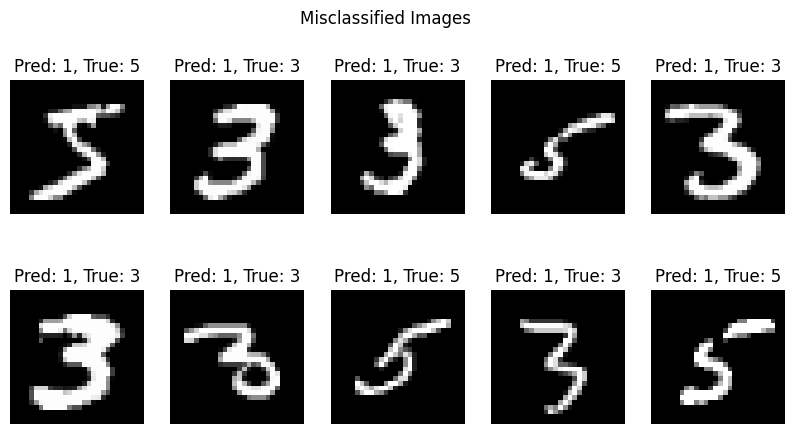

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
  fig, axes = plt.subplots(2, 5, figsize=(10, 5))
  for ax, idx in zip(axes.flat, misclassified_idx[:10]): # Show 10 misclassified images
    ax.imshow(X[idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
    ax.axis("off")
  plt.suptitle("Misclassified Images")
  plt.show()
else:
  print("All images were correctly classified!")

1. Question - 8: What does misclassified_idx store, and how is it used in this code?

ANS: The variable misclassified_idx stores the indices of the data points (images, in this case) that were misclassified by the model.

What it stores:

  * The expression np.where(y_pred != y)[0] compares the predicted labels (y_pred) with the true labels (y) and returns the indices where the prediction is incorrect (i.e., when y_pred != y). This returns an array of indices where misclassifications occurred.

  * The [0] at the end of the expression extracts the indices from the tuple returned by np.where.


How it is used:

  * After identifying the misclassified indices, the code uses these indices to visualize the images that were misclassified.

  * The misclassified_idx array is used to select up to 10 misclassified images from the dataset, which are displayed in a grid using matplotlib.

  * This helps you visually inspect which images were misclassified and potentially diagnose why the model is making errors.

2. Question - 9: How do you interpret the result if the output is ”All images were
correctly classified!”?

ANS: If the output is "All images were correctly classified!", it means that the model successfully predicted every single image correctly. Specifically:

Perfect Accuracy:

  The predicted labels (y_pred) exactly match the true labels (y) for all data points. This implies a final accuracy of 100%, indicating that the model has perfectly learned the patterns in the dataset.
  
Model Performance:

  * In practice, if this happens, it suggests that the model has a very strong ability to generalize to the test data (assuming the model was trained and evaluated on data that is representative of the problem).

  * If this result is achieved on a simple or small dataset, it might be expected. However, if it occurs on a more complex or large dataset, it indicates that the model has learned the task well.

Overfitting Possibility:

  * If the model was trained and tested on the same data and outputs this result, there might be a risk of overfitting, where the model memorizes the training data rather than generalizing to new data.

  * To rule out overfitting, it’s important to evaluate the model on a separate test set or use techniques like cross-validation to assess how it performs on unseen data.